<a href="https://colab.research.google.com/github/kurtofaruk/quizzes/blob/main/WP_%C3%96mer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [426]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


In [427]:
df = pd.read_csv ("/content/water_potability (1).csv") 

In [428]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [429]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [430]:
df.info()
#there are null values in 'ph', 'Sulfate' and 'Trihalomethanes' columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


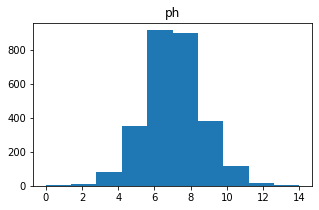

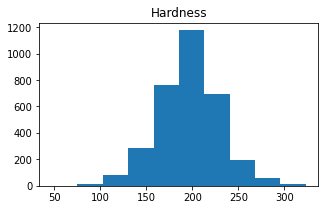

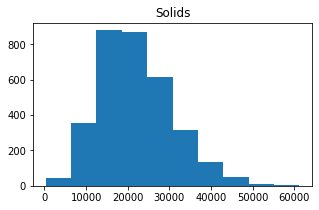

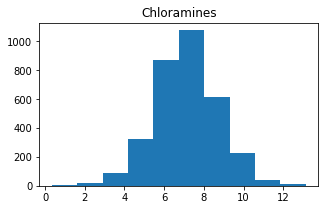

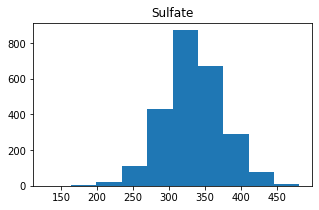

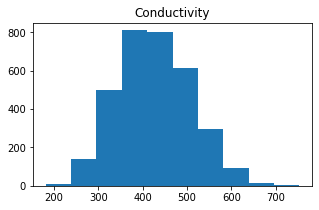

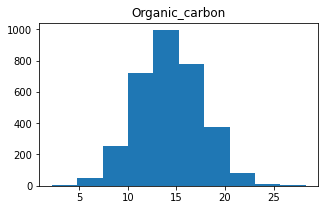

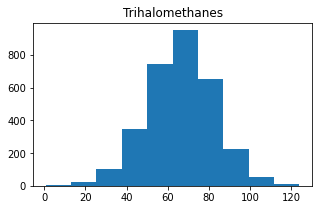

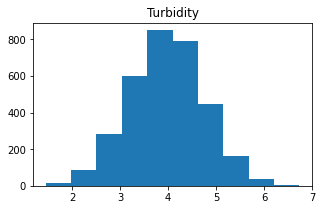

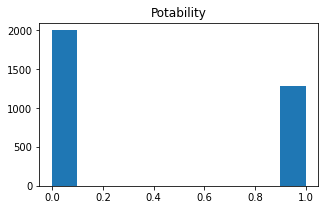

In [431]:
for i in df.columns:
  plt.figure(figsize=(5,3))
  plt.hist(df[i]);
  plt.title(i)
  

In [432]:
count_potable = df[df['Potability']==1].count()
print(count_potable['Potability'])

print(count_potable['Potability'] / df['Potability'].count())
#39% of data is Potable

1278
0.3901098901098901


In [433]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


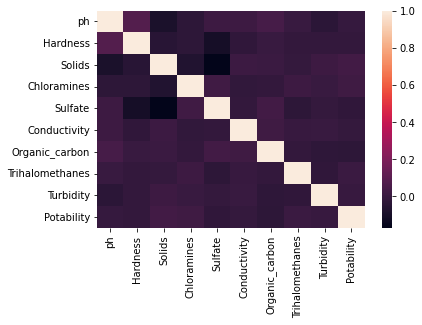

In [434]:
#heatmap of corr matrix
sns.heatmap(df.corr())
#there is no strong relationship among variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

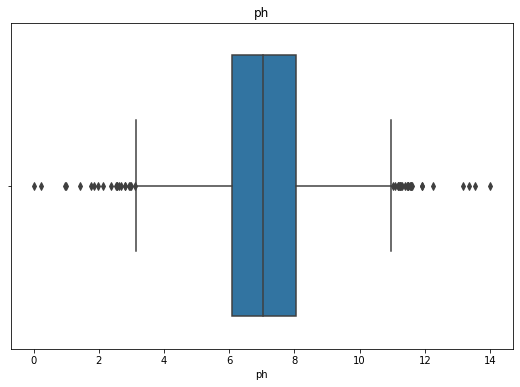

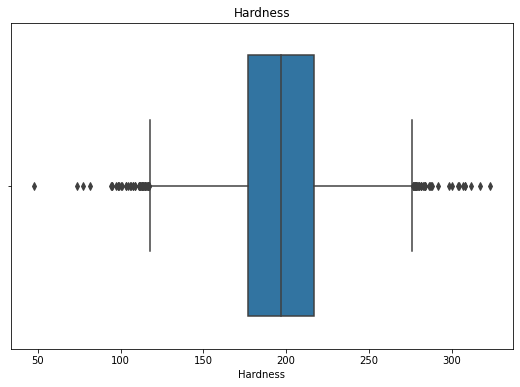

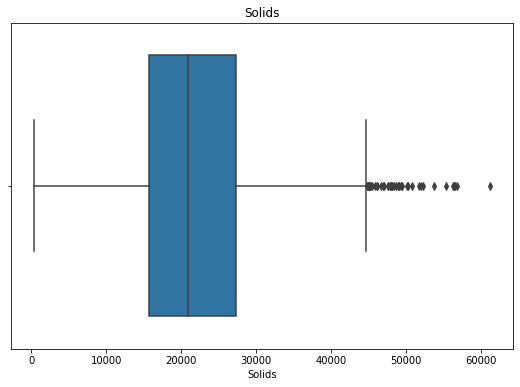

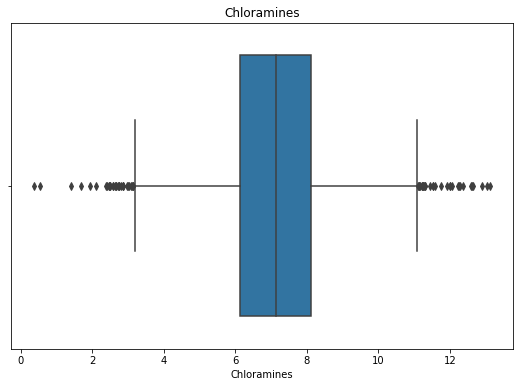

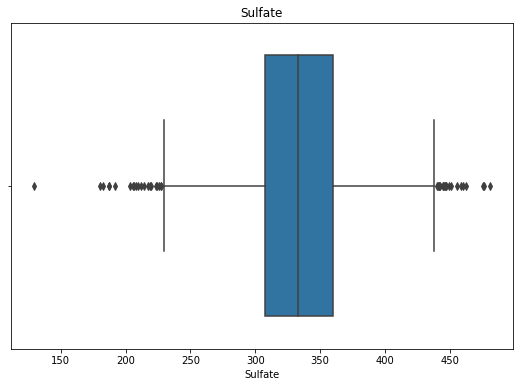

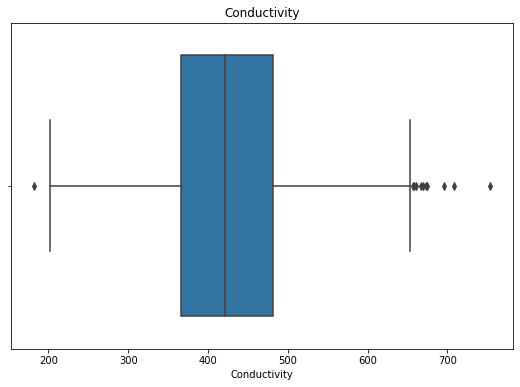

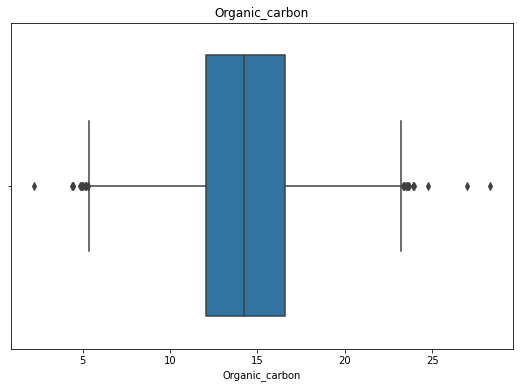

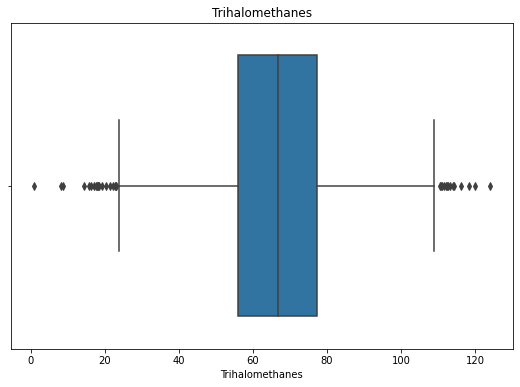

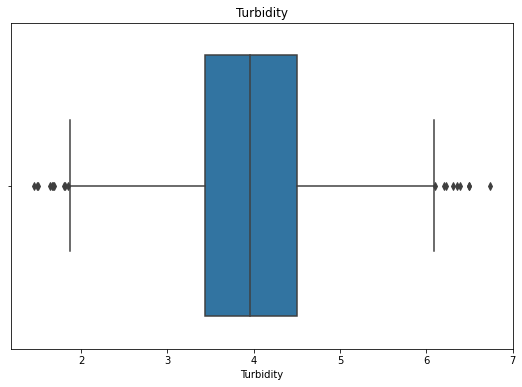

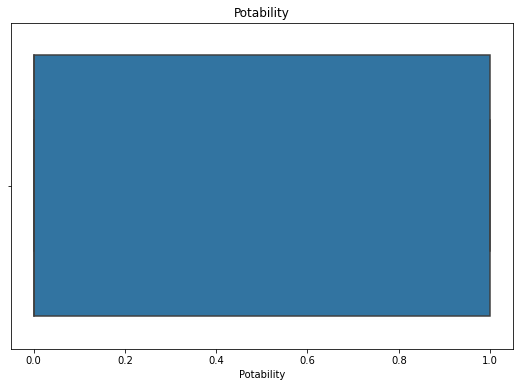

In [435]:
for i in df.columns:
  plt.figure(figsize=(9,6))
  sns.boxplot(df[i])
  plt.title(i);
 #to see outliers
 #there are outliers in 'ph', 'Sulfate' and 'Trihalomethanes' columns

In [436]:
df[df['Potability']==0].describe()
#description of non potable values

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [437]:
df[df['Potability']==1].describe()
#description of potable values

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [438]:
null_rows = df[df.isnull().any(axis=1)] #içinde null değer olan satırları null_rows olarak 
null_rows.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,774.000000,1265.000000,1265.000000,1265.000000,484.000000,1265.000000,1265.000000,1103.000000,1265.000000,1265.000000
mean,7.067296,197.007650,22167.741116,7.103102,336.065594,425.694336,14.169335,66.387967,3.962108,0.369170
std,1.648551,33.268014,8967.041744,1.580760,42.251220,81.030312,3.279272,16.359317,0.780726,0.482771
min,0.000000,47.432000,728.750830,0.352000,211.851592,181.483754,4.473092,0.738000,1.641515,0.000000
25%,6.096638,177.202010,15736.893959,6.112819,309.209549,365.140579,11.876797,55.640854,3.437946,0.000000
50%,7.064259,196.533960,20922.154463,7.105204,335.967454,420.120713,14.066057,66.912400,3.930081,0.000000
75%,8.084984,217.944979,27420.167425,8.120631,360.756486,480.310714,16.334776,77.505822,4.477960,1.000000
max,13.541240,323.124000,61227.196008,12.912187,462.474215,674.443476,28.300000,118.357275,6.739000,1.000000


In [439]:
df.dropna().info()
#When null values are dropped, 2011 rows will remain in df. That is why I will use fillna. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [440]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].mean(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)
#I filled null values by median since there are lots of outliers in'ph', 'Sulfate' and 'Trihalomethanes' columns. 

In [441]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [442]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values

In [443]:
#I seperated data to train and test datasets. 1/5 of data is in test dataset. 4/5 of data is in train dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)                      

In [444]:
"""
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
"""

'\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

In [445]:
#logistic regression algorithm 
logr = LogisticRegression(random_state=0).fit(X,y)
logr.fit(X_train, y_train)
y_pred_logr = logr.predict(X_test)
print(y_pred_logr)
print(logr.score(X,y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [446]:
#accuracy of logistic regression
cm = confusion_matrix(y_test,y_pred_logr)
print('Confusion Matrix of Logistic Regression:' , cm)
print('**********')
acc_logr = accuracy_score(y_test,y_pred_logr)
print('Accuracy of Logistic Regression :' ,acc_logr)
print('**********')
success = cross_val_score(estimator = logr, X=X_train, y=y_train, cv =10)
print(success)
#412 values are correct(TP) output, 244 values are incorrect outputs. There is no output for true negatives.

Confusion Matrix of Logistic Regression: [[412   0]
 [244   0]]
**********
Accuracy of Logistic Regression : 0.6280487804878049
**********
[0.63740458 0.5648855  0.5610687  0.59923664 0.6221374  0.57633588
 0.59923664 0.5610687  0.60687023 0.61450382]


In [447]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
print(y_pred_dtc)
cm=confusion_matrix(y_test,y_pred_dtc)
print('Confusion Matrix of Decision Tree :' , cm)

print('**********')
acc_dtc = accuracy_score(y_test,y_pred_dtc)
print('Accuracy of Decision Tree :' ,acc_dtc)
print('**********')
success = cross_val_score(estimator = dtc, X=X_train, y=y_train, cv =10)
print(success)


[1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1
 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1
 1 0 0 0 0 1 0 1 0 1 0 1 

In [448]:
#Support vector machine algorithm(SVM)
cls = SVC(kernel = 'rbf').fit(X_train,y_train)
y_pred_svm = cls.predict(X_test)
print(y_pred_svm)
cm=confusion_matrix(y_test,y_pred_svm)
print('Confusion Matrix of SVM :' , cm)

print('**********')
acc_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy of SVM :' ,acc_svm)
print('**********')
success = cross_val_score(estimator = dtc, X=X_train, y=y_train, cv =10)
print(success)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [449]:
#XGBoost Classifier
xgb = XGBClassifier()
params_xgb = {'n_estimators': [3,6,9,18,36,72,720], 'learning_rate': [0.2,0.5,0.8,1]}
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print(y_pred_xgb)
cm=confusion_matrix(y_test,y_pred_xgb)
print('Confusion Matrix of XGBoost :' , cm)

print('**********')
acc_xgb = accuracy_score(y_test,y_pred_xgb)
print('Accuracy of XGBoost :' ,acc_xgb)
print('**********')
success = cross_val_score(estimator = xgb, X=X_train, y=y_train, cv =8)
print(success)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [450]:
#RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print(y_pred_rfc)
cm=confusion_matrix(y_test,y_pred_rfc)
print('Confusion Matrix of RFC :' , cm)

print('**********')
acc_rfc = accuracy_score(y_test,y_pred_rfc)
print('Accuracy of RFC :' ,acc_rfc)
print('**********')
success = cross_val_score(estimator = rfc, X=X_train, y=y_train, cv =10)
print(success)

[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [451]:
#K-Nearest Neighbor(KNN) Classification

knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train,y_train)
y_pred_knc = knc.predict(X_test)
print(y_pred_knc)
cm=confusion_matrix(y_test,y_pred_knc)
print('Confusion Matrix of RFC :' , cm)

print('**********')

acc_knc = accuracy_score(y_test,y_pred_knc)
print('Accuracy of KNN :' ,acc_knc)

print('**********')

success = cross_val_score(estimator = knc, X=X_train, y=y_train, cv =10)
print(success)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0
 1 1 0 0 1 0 1 1 1 0 0 0 

In [452]:
print('Accuracy of Logistic Regression :' ,acc_logr)
print('Accuracy of Decision Tree :' ,acc_dtc)
print('Accuracy of SVM :' ,acc_svm)
print('Accuracy of XGBoost :' ,acc_xgb)
print('Accuracy of RFC :' ,acc_rfc)
print('Accuracy of KNN :' ,acc_knc)

Accuracy of Logistic Regression : 0.6280487804878049
Accuracy of Decision Tree : 0.5929878048780488
Accuracy of SVM : 0.6265243902439024
Accuracy of XGBoost : 0.6829268292682927
Accuracy of RFC : 0.6935975609756098
Accuracy of KNN : 0.5914634146341463


In [453]:
#RandomForestClassifier gives the best accuracy score among these and this model is selected.